# Overview
   Plant Leaf Disease detection is an emerging technology that utilizes deep learning algorithms to detect and identify pests in agricultural crops. This technology has gained popularity in recent years due to the increasing demand for sustainable agriculture practices and the need to reduce the risk of plants.These systems can detect disease at an early stage, which allows for timely interventions to prevent crop losses.

# Go to dataset folder and explore it

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
ls

 Apple___Apple_scab/                            Peach___healthy/
 Apple___Black_rot/                             Pepper,_bell___Bacterial_spot/
 Apple___Cedar_apple_rust/                      Pepper,_bell___healthy/
 Apple___healthy/                               Potato___Early_blight/
 Cherry___healthy/                              Potato___healthy/
 Cherry___Powdery_mildew/                       Potato___Late_blight/
 cnn_leaf1.pth                                  Strawberry___healthy/
 cnn_leaf.pth                                   Strawberry___Leaf_scorch/
 cnn_metrics.csv                                Tomato___Bacterial_spot/
'Corn___Cercospora_leaf_spot Gray_leaf_spot'/   Tomato___Early_blight/
 Corn___Common_rust/                            Tomato___healthy/
 Corn___healthy/                                Tomato___Late_blight/
 Corn___Northern_Leaf_Blight/                   Tomato___Leaf_Mold/
 Grape___Black_rot/                             Tomato___Septoria_leaf_spot/
'Grape__

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to the directory containing the class folders
dataset_path = './'

# Get the list of class folders
class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Initialize lists to store class names and corresponding image counts
class_names = []
image_counts = []
imagno={}
# Iterate through each class folder
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)

    # Count the number of images in each class folder
    num_images = len(os.listdir(class_path))

    # Append class name and image count to lists
    class_names.append(class_folder)
    image_counts.append(num_images)
    imagno[class_folder]=num_images


print(imagno)

{'Apple___Apple_scab': 1000, 'Apple___Black_rot': 1000, 'Apple___Cedar_apple_rust': 1000, 'Apple___healthy': 1645, 'Cherry___healthy': 1000, 'Cherry___Powdery_mildew': 1052, 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 1000, 'Corn___Common_rust': 1192, 'Corn___healthy': 1162, 'Corn___Northern_Leaf_Blight': 1020, 'Grape___Black_rot': 1190, 'Grape___Esca_(Black_Measles)': 1383, 'Grape___healthy': 1000, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1076, 'Peach___Bacterial_spot': 2307, 'Peach___healthy': 1000, 'Pepper,_bell___Bacterial_spot': 1010, 'Pepper,_bell___healthy': 1478, 'Potato___Early_blight': 1000, 'Potato___healthy': 1000, 'Potato___Late_blight': 1000, 'Strawberry___healthy': 1001, 'Strawberry___Leaf_scorch': 1109, 'Tomato___Bacterial_spot': 2127, 'Tomato___Early_blight': 1000, 'Tomato___healthy': 1591, 'Tomato___Late_blight': 1909, 'Tomato___Leaf_Mold': 1000, 'Tomato___Septoria_leaf_spot': 1771, 'Tomato___Spider_mites Two-spotted_spider_mite': 1686, 'Tomato___Target_Spot': 

# Checking The height and width of original image

In [ ]:
from PIL import Image

# Open the image file
image = Image.open("/content/drive/MyDrive/plantleaf/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/image (100).JPG")

# Get the width and height of the image
width, height = image.size

# Print the width and height
print(f"Width: {width} pixels")
print(f"Height: {height} pixels")

Width: 256 pixels
Height: 256 pixels


# Importing all necessary libraries.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np



# Creating Training Testing and Validation Dataset

In [ ]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split

# Define data transformations (you can customize these based on your needs)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a consistent size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# Set device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the root folder where your data is stored
data_root = './'

# Create the ImageFolder dataset
dataset = datasets.ImageFolder(root=data_root, transform=transform)

# Split the dataset into training and testing sets
#train_size = int(0.8 * len(dataset))
#test_size = len(dataset) - train_size
#train_dataset, test_dataset = random_split(dataset, [train_size, test_size])


train_size = int(0.7 * len(dataset))
val_size = (len(dataset) - train_size) // 2
#val_size = int(0.2 * dataset_size)
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoader for training and testing
#train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
#test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size= 128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Print the number of samples in each set
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")

Number of training samples: 28079
Number of validation samples: 6017
Number of testing samples: 6017


# Create Small Dataset
As previous dataset is so huge, i am unable to train this model with this dataset in google colab in their limited usage time. So i created a small dataset with 600 images per class.

In [ ]:
import os
from shutil import copyfile
import random
from multiprocessing import Pool, cpu_count

# Define the paths for the new dataset
main_dataset_dir = './'
new_dataset_dir = '/content/drive/MyDrive/plantleafsmall'

# Create the main directory for the new dataset
os.makedirs(new_dataset_dir, exist_ok=True)

# List of class names (folder names) in the main dataset directory
class_names = [d for d in os.listdir(main_dataset_dir) if os.path.isdir(os.path.join(main_dataset_dir, d))]

# Create subdirectories for each class in the new dataset
for class_name in class_names:
    os.makedirs(os.path.join(new_dataset_dir, class_name), exist_ok=True)

# Function to copy images from a class folder
def copy_images_from_class(class_name):
    class_src_dir = os.path.join(main_dataset_dir, class_name)
    class_dest_dir = os.path.join(new_dataset_dir, class_name)

    # Get list of all image files in the class directory
    image_files = [f for f in os.listdir(class_src_dir) if os.path.isfile(os.path.join(class_src_dir, f))]

    # Sample up to 700 images
    sampled_images = random.sample(image_files, min(len(image_files), 600))

    # Copy each sampled image to the new class directory
    for img in sampled_images:
        src_path = os.path.join(class_src_dir, img)
        dest_path = os.path.join(class_dest_dir, img)
        copyfile(src_path, dest_path)

# Use multiprocessing to copy images from all class folders in parallel
if __name__ == '__main__':
    with Pool(cpu_count()) as p:
        p.map(copy_images_from_class, class_names)

# Print completion message
print('New dataset created with up to 600 images per class.')



New dataset created with up to 600 images per class.


In [ ]:
import os
import matplotlib.pyplot as plt

# Path to the directory containing the class folders
dataset_path = '/content/drive/MyDrive/plantleafsmall'

# Get the list of class folders
class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Initialize lists to store class names and corresponding image counts
class_names = []
image_counts = []
imagno={}
# Iterate through each class folder
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)

    # Count the number of images in each class folder
    num_images = len(os.listdir(class_path))

    # Append class name and image count to lists
    class_names.append(class_folder)
    image_counts.append(num_images)
    imagno[class_folder]=num_images


print(imagno)

{'Tomato___healthy': 600, 'Tomato___Early_blight': 600, 'Tomato___Late_blight': 600, 'Tomato___Septoria_leaf_spot': 600, 'Tomato___Spider_mites Two-spotted_spider_mite': 600, 'Tomato___Leaf_Mold': 600, 'Tomato___Tomato_mosaic_virus': 600, 'Tomato___Target_Spot': 600, 'Strawberry___Leaf_scorch': 600, 'Tomato___Bacterial_spot': 600, 'Pepper,_bell___Bacterial_spot': 600, 'Grape___healthy': 600, 'Strawberry___healthy': 610, 'Peach___healthy': 600, 'Potato___Late_blight': 600, 'Potato___Early_blight': 600, 'Pepper,_bell___healthy': 600, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 601, 'Potato___healthy': 600, 'Peach___Bacterial_spot': 610, 'Cherry___Powdery_mildew': 600, 'Cherry___healthy': 600, 'Apple___Cedar_apple_rust': 600, 'Corn___healthy': 600, 'Apple___healthy': 600, 'Corn___Common_rust': 600, 'Grape___Black_rot': 600, 'Grape___Esca_(Black_Measles)': 600, 'Corn___Northern_Leaf_Blight': 600, 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 600, 'Apple___Apple_scab': 600, 'Apple___Black

# Createing training, Validation and Testing Dataloader from this small dataset.

In [ ]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split

# Define data transformations (you can customize these based on your needs)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a consistent size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# Set device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the root folder where your data is stored
data_root = '/content/drive/MyDrive/plantleafsmall'

# Create the ImageFolder dataset
dataset = datasets.ImageFolder(root=data_root, transform=transform)

# Split the dataset into training and testing sets
#train_size = int(0.8 * len(dataset))
#test_size = len(dataset) - train_size
#train_dataset, test_dataset = random_split(dataset, [train_size, test_size])


train_size = int(0.7 * len(dataset))
val_size = (len(dataset) - train_size) // 2
#val_size = int(0.2 * dataset_size)
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoader for training and testing
#train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
#test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size= 64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Print the number of samples in each set
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")

Number of training samples: 13454
Number of validation samples: 2883
Number of testing samples: 2884


# Defining Model.
Here i made a simplecnn model with 3 convolution layer followed by a pooling layer and 2 fully connected layers.

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

num_classes = len(dataset.classes)
model = SimpleCNN(num_classes).to(device)

# Print the model architecture to verify it matches your requirements
#print(model)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=32, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

# Get the model summary

In [ ]:
from torchsummary import summary
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
         MaxPool2d-2         [-1, 16, 112, 112]               0
            Conv2d-3         [-1, 32, 112, 112]           4,640
         MaxPool2d-4           [-1, 32, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          18,496
         MaxPool2d-6           [-1, 64, 28, 28]               0
            Linear-7                  [-1, 512]      25,690,624
           Dropout-8                  [-1, 512]               0
            Linear-9                   [-1, 32]          16,416
Total params: 25,730,624
Trainable params: 25,730,624
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 13.41
Params size (MB): 98.15
Estimated Total Size (MB): 112.14
---------------------------------

# Training the Model
In this block i trained the model with 20 epochs and epoch wise all accuracy and loss data saved on a csv file which is cnn_metrics.csv

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import csv

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for data, target in train_loader:
        data = data.to(torch.device('cuda'))
        target = target.to(torch.device('cuda'))
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * data.size(0)

        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

    train_accuracy = 100 * correct / total

    return running_loss / len(train_loader.dataset), train_accuracy

# Validation loop
def validate(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(torch.device('cuda'))
            labels = labels.to(torch.device('cuda'))
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy = 100 * correct / total
    return val_loss / len(val_loader.dataset), val_accuracy

# Testing loop
def test(model, test_loader):
    model.eval()
    model.to('cuda')  # Move the model to GPU
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to('cuda'), labels.to('cuda')  # Move data to GPU
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    return test_accuracy

# Open a CSV file to store the metrics
with open('cnn_metrics.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Epoch', 'Train Loss', 'Train Accuracy', 'Val Loss', 'Val Accuracy', 'Test Accuracy'])

    # Training the model
    num_epochs = 20
    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, train_loader, optimizer, criterion)
        val_loss, val_acc = validate(model, val_loader, criterion)
        test_acc = test(model, test_loader)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}%, Test Acc: {test_acc:.4f}%")

        # Write the metrics to the CSV file
        writer.writerow([epoch+1, train_loss, train_acc, val_loss, val_acc, test_acc])

print("Training metrics saved to cnn_metrics.csv")


Epoch [1/20], Train Loss: 1.7462, Train Acc: 48.5952%, Val Loss: 0.7955, Val Acc: 76.4135%, Test Acc: 77.7393%
Epoch [2/20], Train Loss: 0.7812, Train Acc: 75.0483%, Val Loss: 0.5608, Val Acc: 83.8710%, Test Acc: 83.9459%
Epoch [3/20], Train Loss: 0.5425, Train Acc: 82.7635%, Val Loss: 0.4116, Val Acc: 87.7558%, Test Acc: 88.3842%
Epoch [4/20], Train Loss: 0.3751, Train Acc: 88.0705%, Val Loss: 0.3765, Val Acc: 89.2820%, Test Acc: 89.7365%
Epoch [5/20], Train Loss: 0.2554, Train Acc: 91.6233%, Val Loss: 0.3552, Val Acc: 89.9063%, Test Acc: 90.1872%
Epoch [6/20], Train Loss: 0.2034, Train Acc: 93.3849%, Val Loss: 0.3533, Val Acc: 89.9410%, Test Acc: 90.4993%
Epoch [7/20], Train Loss: 0.1404, Train Acc: 95.3545%, Val Loss: 0.3707, Val Acc: 89.5942%, Test Acc: 90.7074%
Epoch [8/20], Train Loss: 0.1077, Train Acc: 96.4026%, Val Loss: 0.3730, Val Acc: 90.3226%, Test Acc: 89.9792%
Epoch [9/20], Train Loss: 0.1115, Train Acc: 96.3208%, Val Loss: 0.3890, Val Acc: 89.8370%, Test Acc: 89.8058%
E

# Saving the Model

In [ ]:
# Save the trained model
torch.save(model.state_dict(), 'cnn_leaf.pth')

# Get the model accuracy, precision and recall
After training this model we got the model Accuracy: 91.1% , Precision:0.9135 and Recall: 0.9092.

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import numpy as np
def testing(model, test_loader):
    model.eval()
    model.to('cuda')  # Move the model to GPU
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to('cuda'), labels.to('cuda')  # Move data to GPU
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    test_accuracy = 100 * correct / total

    conf_matrix = confusion_matrix(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions, average='macro')
    recall = recall_score(all_labels, all_predictions, average='macro')

    return test_accuracy, conf_matrix, precision, recall

In [ ]:
acc, conf_matrix, precision, recall = testing(model, test_loader)
print(f"Accuracy: {acc:.4f}%, Precision: {precision:.4f}, Recall: {recall:.4f}")

Accuracy: 91.1581%, Precision: 0.9135, Recall: 0.9092


# Getting the model Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import numpy as np

def plot_confusion_matrix(conf_matrix, class_names, title='Confusion Matrix'):
    plt.figure(figsize=(20, 20))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.savefig('cnn_confusion_matrix.png')
    plt.show()

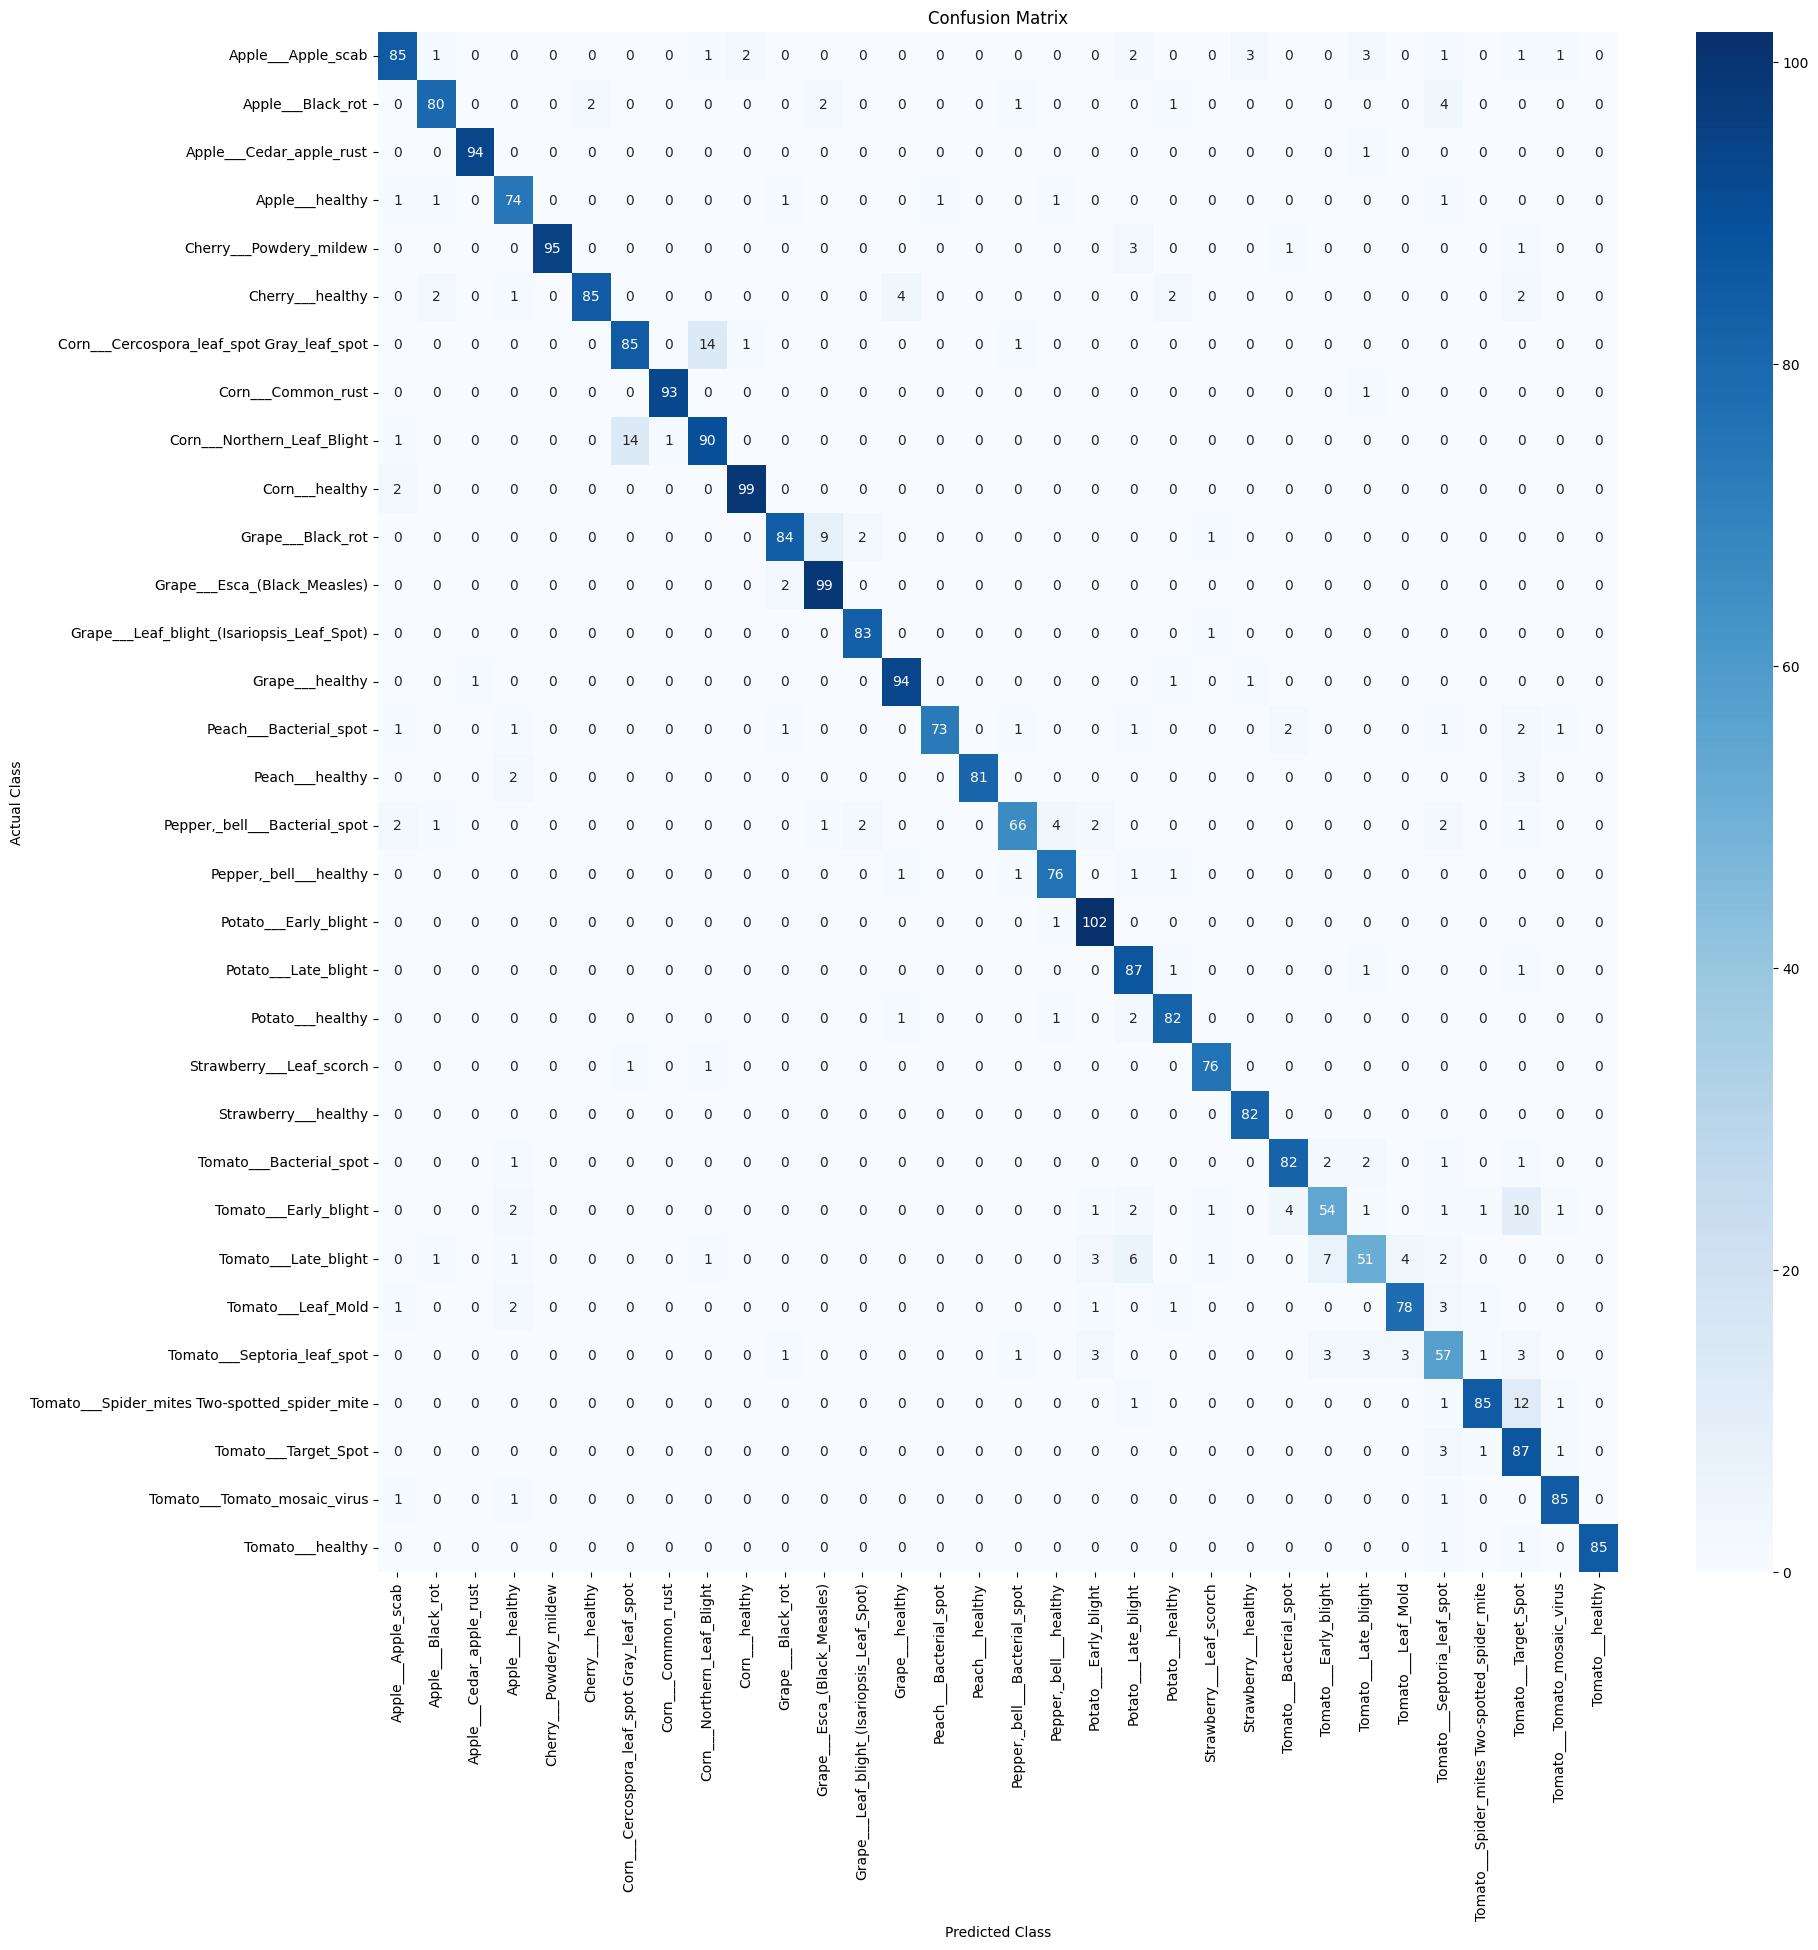

In [ ]:
class_names = dataset.classes
plot_confusion_matrix(conf_matrix, class_names, title='Confusion Matrix')

# Plot the graph of Training Loss vs Validation Loss Per epoch.

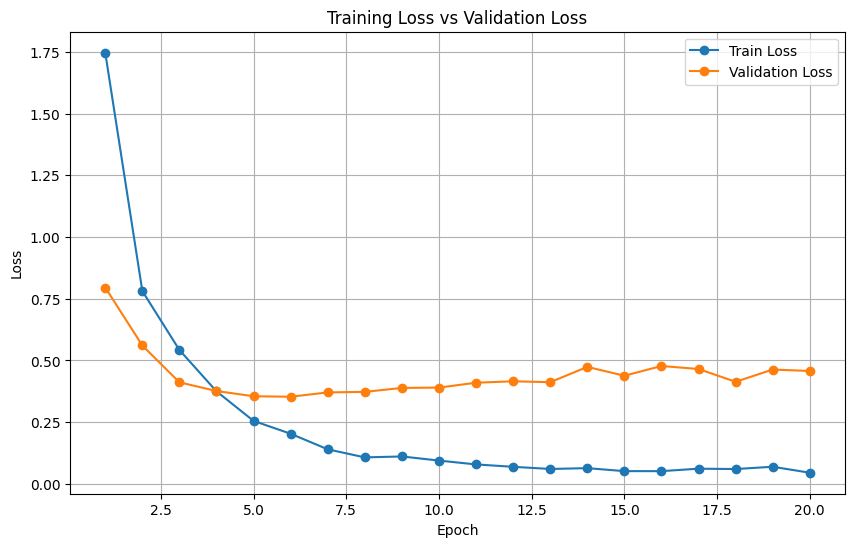

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_loss(csv_file):
    # Read the CSV file
    data = pd.read_csv(csv_file)

    # Extract the relevant columns
    epochs = data['Epoch']
    train_loss = data['Train Loss']
    val_loss = data['Val Loss']

    # Plot the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_loss, label='Train Loss', marker='o')
    plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Validation Loss')
    plt.savefig('training_vs_validation_loss.png')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Training vs Validation Loss
plot_loss('cnn_metrics.csv')


# Plot the graph of Training Accuracy Vs Validation Accuracy per epoch.

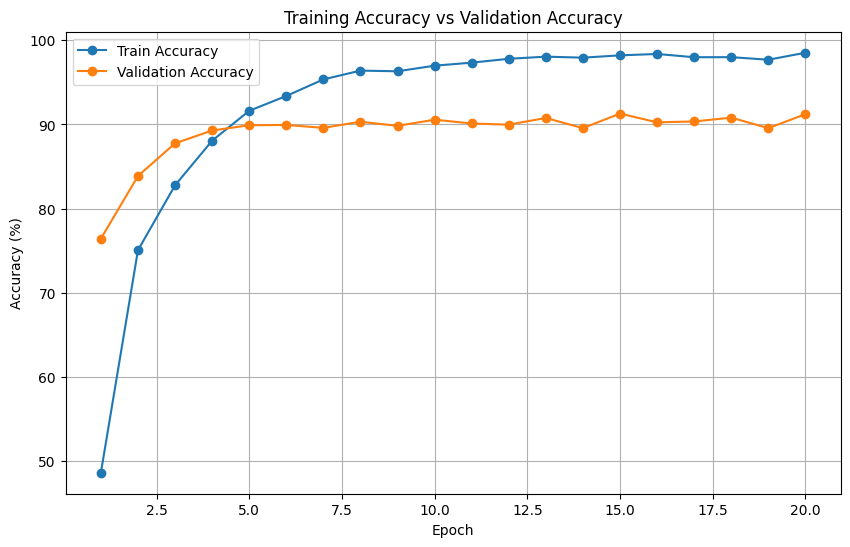

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_accuracy(csv_file):
    # Read the CSV file
    data = pd.read_csv(csv_file)

    # Extract the relevant columns
    epochs = data['Epoch']
    train_acc = data['Train Accuracy']
    val_acc = data['Val Accuracy']

    # Plot the training and validation accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_acc, label='Train Accuracy', marker='o')
    plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.savefig('training_vs_validation_accuracy.png')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Training vs Validation Accuracy
plot_accuracy('cnn_metrics.csv')

# Loading the model for further any usage

In [ ]:
# Load the saved model
model1 = SimpleCNN(num_classes)
model1.load_state_dict(torch.load('cnn_leaf.pth'))